# Deautsch-Jozsa Algorithm
This notbook implements the **Deautsch-Jozsa Algorithm** for **3-bit input** .The goal is distinguish whether an unknown oracle function $ {f(x)} $ is:

- **Constant** - outputs same value for all inputs ('0' or '1')
- **Balanced** - outputs '0' for half of inputs and '1' for the other half

The Algorithm solves this with **one** oracle query.

---

## Deautsch-Jozsa Algorithm Steps 
1. **Initialize qubits**: 3input qubits in $ {|0\rangle} $ ,one output qubit in $ {|1\rangle} $.
2. Apply **Hadamard Gate** to all qubits
3. Apply **Oracle** (Constant or Balanced Example)
4. **Hadamard** on input qubits only.
5. **Measure**input qubits

**Interpretation**:
- If output is '000' $ {\rightarrow} $ function is **Constant**.
- If output is not '000' $ {\rightarrow} $ function is **Balanced**.

## Import Required Qiskit Library

In [1]:
from qiskit import QuantumCircuit 
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

## 1. Helper function : Ceate Deautsch-Jozsa Circuit

In [2]:
def deautsch_jozsa_3bit(oracle_function):
    # oracle_function : a function that adds oracle gates to a circuit.
    qc=QuantumCircuit(4,3)

    # Step 1 - Initialize oracle qubit to |1>
    qc.x(3)

    #Step 2 - Apply Haddamard to all qubits
    for q in range(4):
        qc.h(q)
    
    # Step 3- Apply Oracle
    oracle_function(qc)

    # Step 4- Apply Hadamard on input qubit only
    for q in range(3):
        qc.h(q)

    # Step 5 - Measure input qubits
    qc.measure([0,1,2],[0,1,2])

    return qc

## 2. Oracle Implementation
We define two example oracles:

1.**Constant Oracle** - Always Return 1

Implementation : Flip Output Qubit using X

2.**Balanced Oracle Example**-

Implemenation - $ {f(x) = x_0 \oplus x_2 } $.

This is Balalnced because half of the inputs produce 0 and the other half produce 1.


In [3]:
# Constant oracle : always return 1
def constant_oracle(qc):
    qc.x(3)

# Balanced Oracle : f(x)= x0 XOR x2
def balanced_oracle(qc):
    qc.cx(0,3)
    qc.cx(2,3)

## 3. Run Deutsch-Jozsa with Constant Oracle

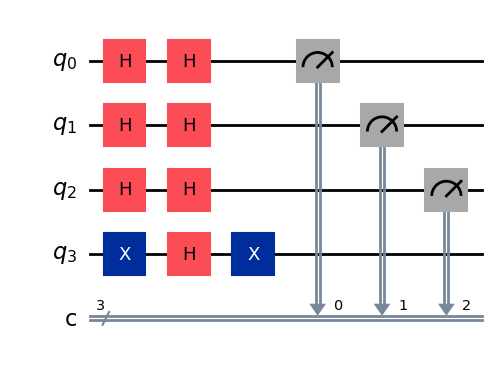

In [4]:
qc_const =deautsch_jozsa_3bit(constant_oracle)
qc_const.draw('mpl')

## 4. Run circuit on Simulator

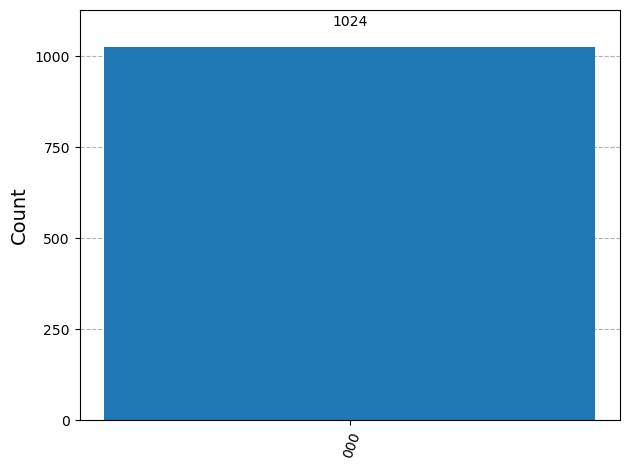

In [5]:
sim=AerSimulator()
result=sim.run(qc_const,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts)

**Interpretation** :
- If output is '000' , oracle is **constant**. above histrogram show 100% probability for **000** hence functon is **Constant**

## 4. Run Deautsch-Jozsa with Balanced Oracle

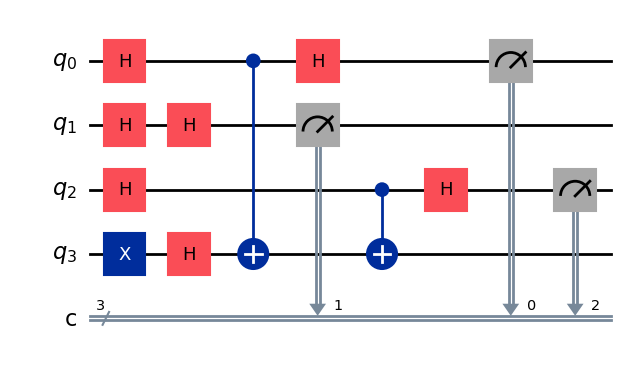

In [6]:
qc_bal=deautsch_jozsa_3bit(balanced_oracle)
qc_bal.draw('mpl')

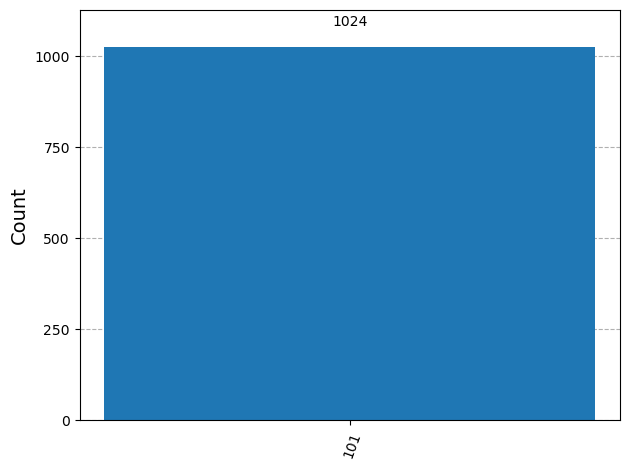

In [8]:
result_bal=sim.run(qc_bal,shots=1024).result()
counts=result_bal.get_counts()
plot_histogram(counts)

**Interpretation** :
- If output is not '000' , oracle is **Balnced**. above histrogram show 100% probability for **101** i.e not equal **000** hence function is **Balanced**

This notebook demonstrate the **Deautsch-Jozsa Algorithm for a 3-bit input** with clear example:
- constant oracle
- Balanced oracle

**Deautsch-Jozsa Algorithm** Bulid foundation for real world quantum speedup.it demonstrate exponential time speedup


---

**Author:** *Shreya Palase*  

**Date Created:**  *6-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day13_DeautschJozsaAlgo.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>